In [34]:
# %matplotlib widget 
import pandas as pd
from torque_log_analysis import resample_data,drop_rows_from_df
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [35]:
# Open log
path = (r"C:\Users\Matthew Samson\Documents\formula\4_2_2024_KS7e First Shakedown\parsed-data")
# path = r"C:\Users\Matthew Samson\Downloads\OneDrive_1_4-4-2024"
path = (r"C:\Users\Matthew Samson\Documents\formula\228hvVoltageDropout\parsed-data")
path = (r"C:\Users\Matthew Samson\Documents\formula\228hvVoltageDropout\parsed-data")
path = (r"C:/Users/Matthew Samson/Documents/formula/4_9_dyno_faults/parsed-data")
# path = (r"C:\Users\Matthew Samson\Documents\formula\10_16_23 Dyno day\240nm vehicle logs\parsed-data")
logs = {}
for filename in os.listdir(path):
            if filename.endswith('.csv') or filename.endswith('.CSV'):
                file_path = os.path.join(path, filename)
                # try:
                df = pd.read_csv(file_path)
                            # Drop the first 50 rows
                # df = df.drop(df.index[:10])
                df = resample_data(df,"Time",10)
                # df = drop_rows_from_df(df,"")
                # Reset the index if you want
                df = df.reset_index(drop=True)
                logs[filename] = df
                # except:
                #     print(f"Error with {filename}")
                #     continue


In [50]:
for name,df in logs.items():
    for i in (list(df)):
        if 'current' in i or 'Current' in i:
            print(i)

Pack_Current
D1_Phase_A_Current
D2_Phase_B_Current
D3_Phase_C_Current
D4_DC_Bus_Current
D1_Phase_A_Current
D2_Phase_B_Current
D3_Phase_C_Current
D4_DC_Bus_Current
Pack_Current
D1_Phase_A_Current
D2_Phase_B_Current
D3_Phase_C_Current
D4_DC_Bus_Current
Pack_Current
D1_Max_Discharge_Current
D2_Max_Charge_Current


In [36]:
for name,df in logs.items():
    for i in (list(df)):
        if 'Volt' in i or 'volt' in i:
            print(i)

D1_DC_Bus_Voltage
D2_Output_Voltage
D3_VAB_Vd_Voltage
D4_VBC_Vq_Voltage
Pack_Open_Voltage
Pack_Inst_Voltage
Pack_Summed_Voltage
D1_Reference_Voltage_1_5
D2_Reference_Voltage_2_5
D3_Reference_Voltage_5_0
D4_Reference_Voltage_12_0
acu_glv_voltage
acu_sdc_voltage
acu_5v_voltage
D1_Reference_Voltage_1_5
D2_Reference_Voltage_2_5
D3_Reference_Voltage_5_0
D4_Reference_Voltage_12_0
D1_DC_Bus_Voltage
D2_Output_Voltage
D3_VAB_Vd_Voltage
D4_VBC_Vq_Voltage
Pack_Open_Voltage
Pack_Inst_Voltage
Pack_Summed_Voltage
acu_glv_voltage
acu_sdc_voltage
acu_5v_voltage
D1_Reference_Voltage_1_5
D2_Reference_Voltage_2_5
D3_Reference_Voltage_5_0
D4_Reference_Voltage_12_0
D1_DC_Bus_Voltage
D2_Output_Voltage
D3_VAB_Vd_Voltage
D4_VBC_Vq_Voltage
acu_glv_voltage
acu_sdc_voltage
acu_5v_voltage
Pack_Open_Voltage
Pack_Inst_Voltage
Pack_Summed_Voltage
precharge_accVoltageMod100
precharge_accVoltageDiv100
precharge_tsVoltageMod100
precharge_tsVoltageDiv100


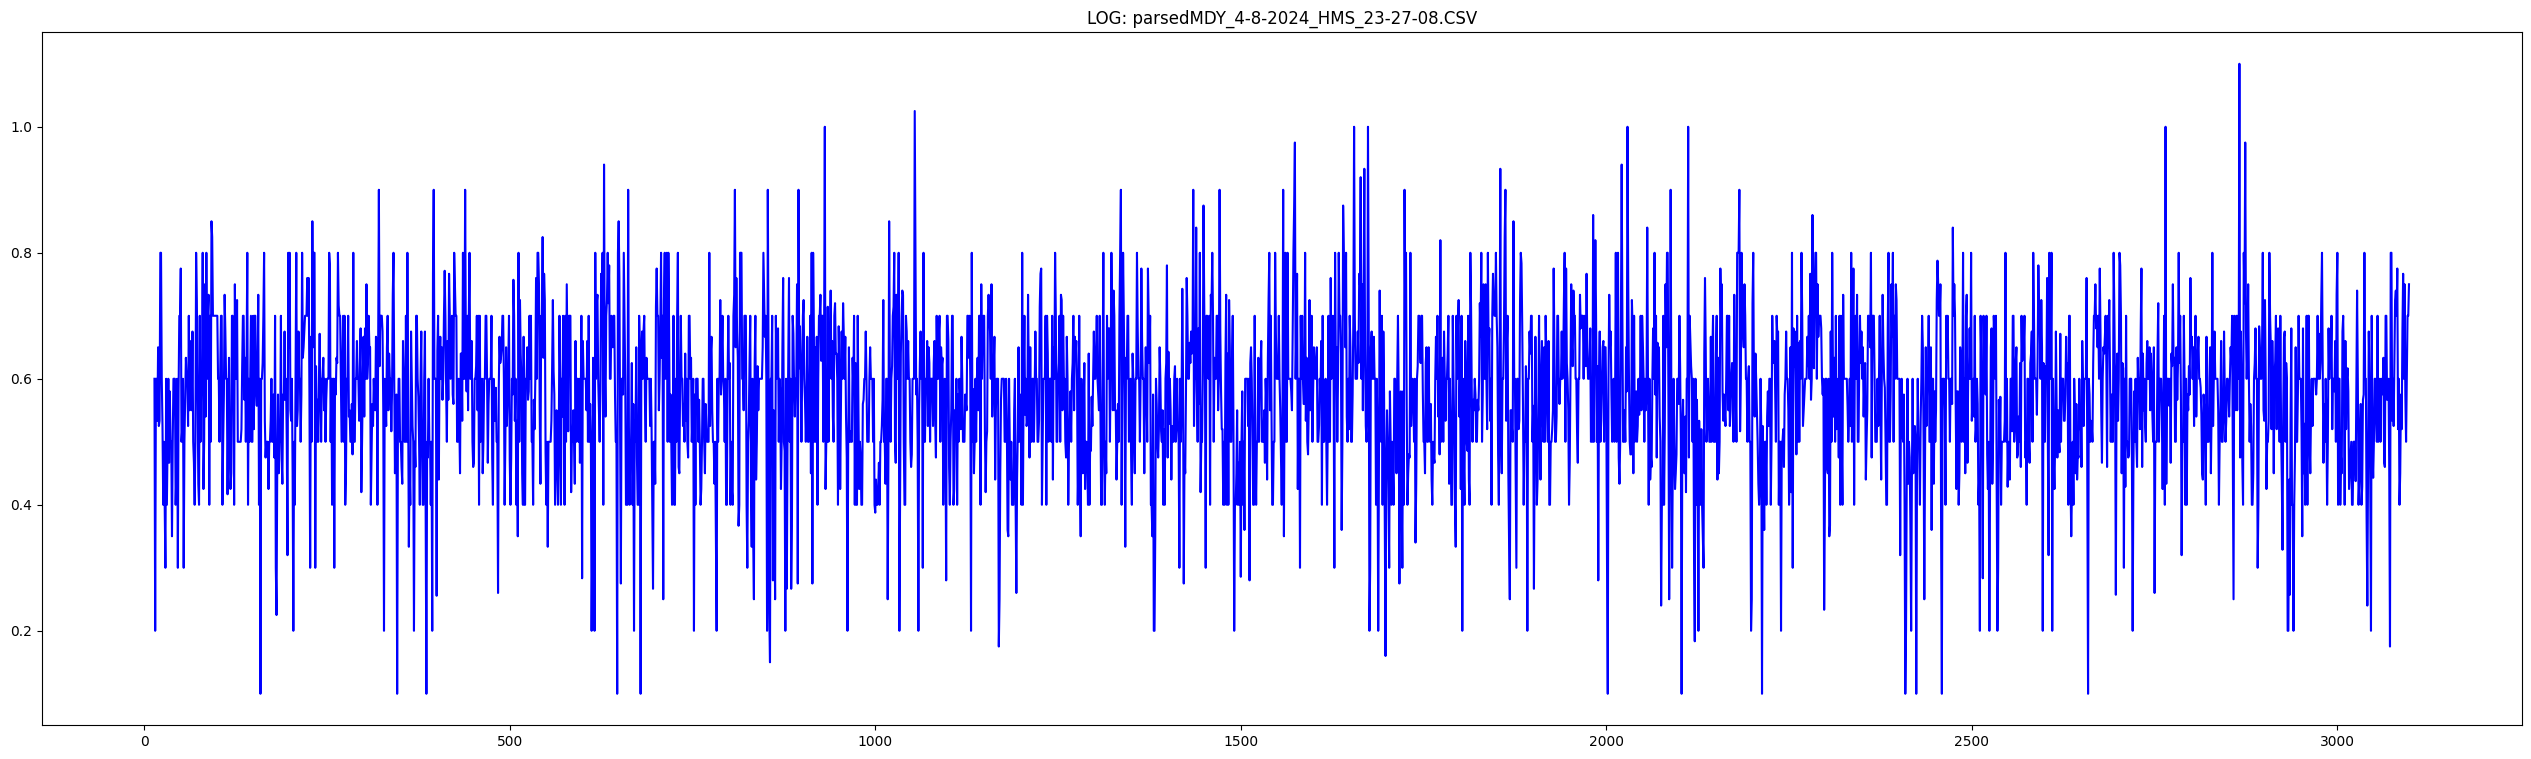

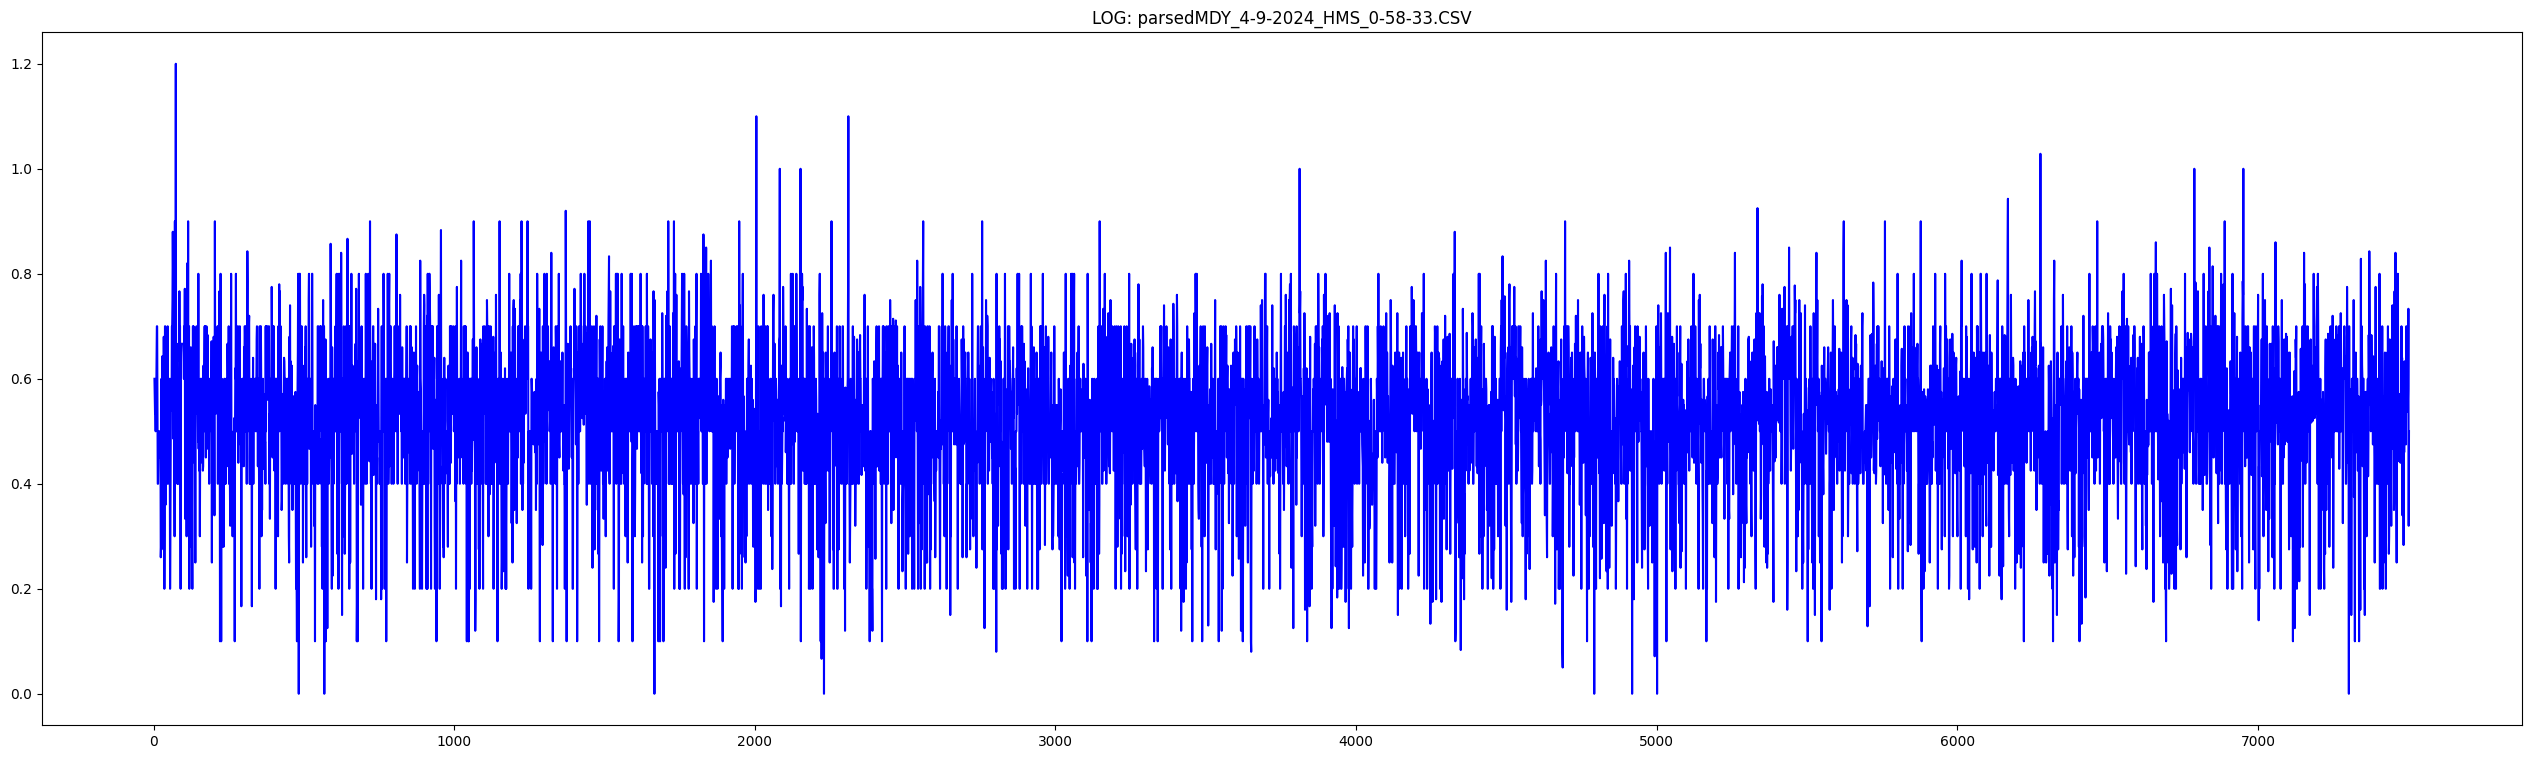

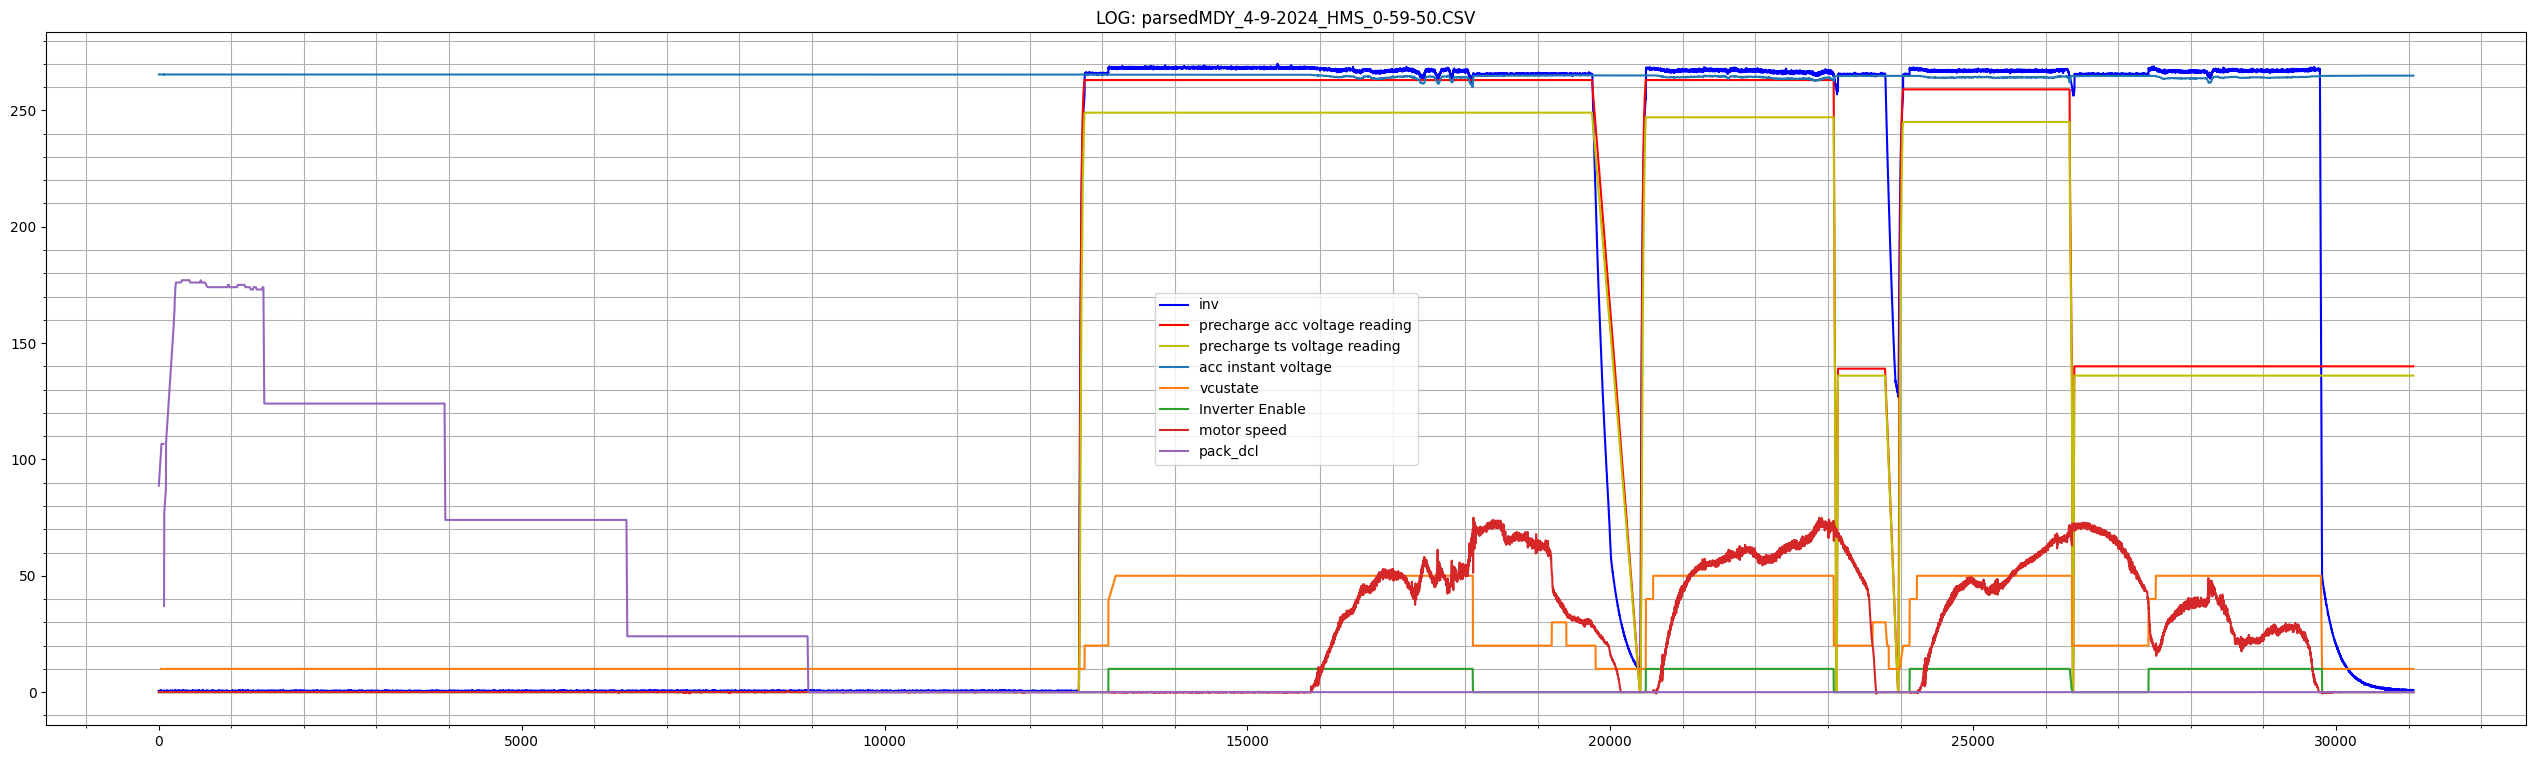

In [57]:
for name,df in logs.items():
    try:
        plt.figure(figsize=(32,9))
        # plt.axes().yaxis.set_minor_locator(ticker.AutoMinorLocator)
        plt.title(f"LOG: {name}")
        plt.plot(df.index,df['D1_DC_Bus_Voltage'],label='inv',color='b')
        plt.plot(df.index,df['precharge_accVoltageMod100']+(df['precharge_accVoltageDiv100']*100),label='precharge acc voltage reading',color='r')
        plt.plot(df.index,df['precharge_tsVoltageMod100']+(df['precharge_tsVoltageDiv100']*100),label='precharge ts voltage reading',color='y')
        plt.plot(df.index,df['Pack_Inst_Voltage'],label='acc instant voltage')
        plt.plot(df.index,df["VCU_STATEMACHINE_STATE"]*10,label='vcustate')
        plt.plot(df.index,df['D6_Inverter_Enable_State']*10,label='Inverter Enable')
        plt.plot(df.index,df['D2_Motor_Speed']/10,label='motor speed')
        plt.plot(df.index,df['Pack_DCL'],label='pack_dcl')
        # plt.yaxis.set_minor_locator(ticker.MultipleLocator(10))
        plt.minorticks_on()
        plt.grid(True,which='minor')
        plt.legend()    
        plt.show()
    except:
        continue


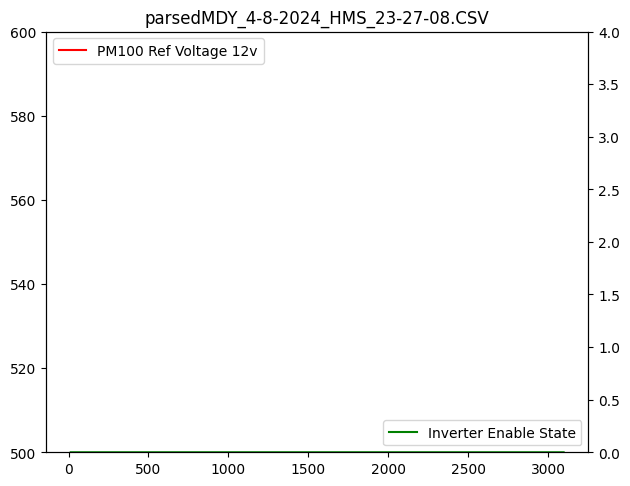

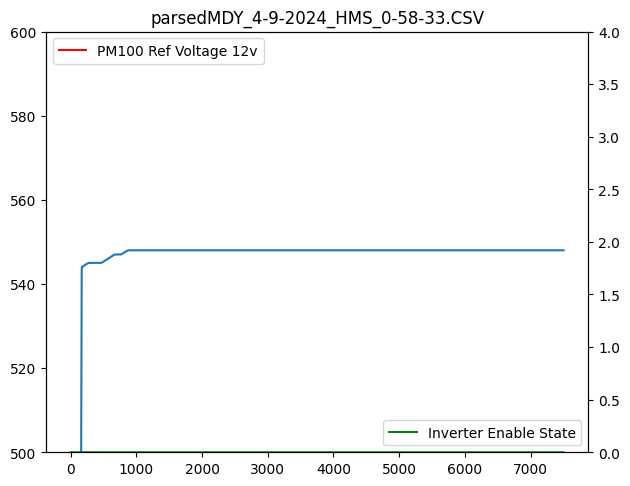

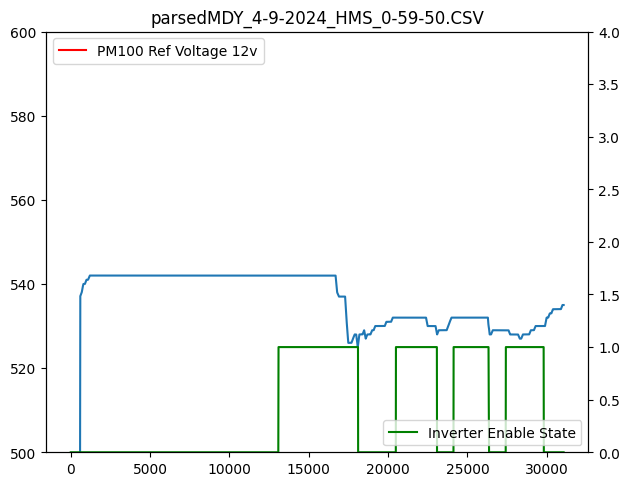

In [38]:
for name,df in logs.items():
    fig, ax = plt.subplots(1,1)
    ax.plot(df.index,df['D4_Reference_Voltage_12_0'],color='r',label='PM100 Ref Voltage 12v')
    ax.plot(df.index,df['VCU_SDC_VOLTAGE'])
    ax.set_ylim(500,600)
    ax.legend(loc='upper left')
    ax1 = ax.twinx()
    ax1.plot(df.index,df['D6_Inverter_Enable_State'],color='g',label='Inverter Enable State')
    ax1.legend(loc='lower right')
    ax1.set_ylim(0,4)
    plt.tight_layout()
    plt.title(name)

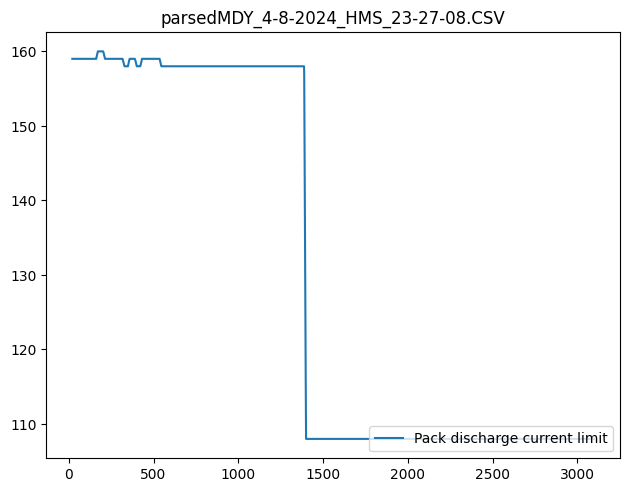

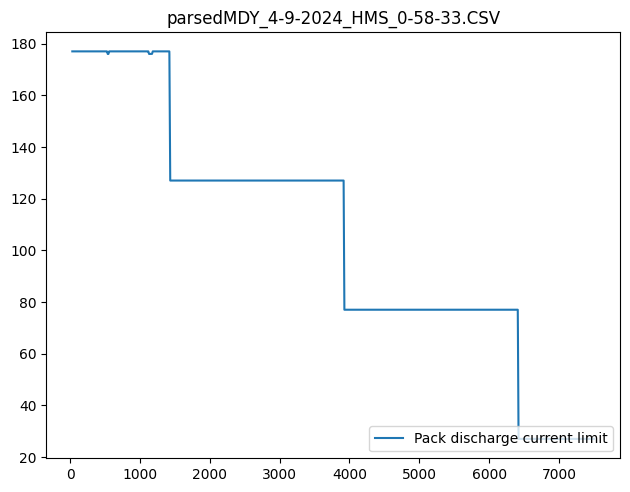

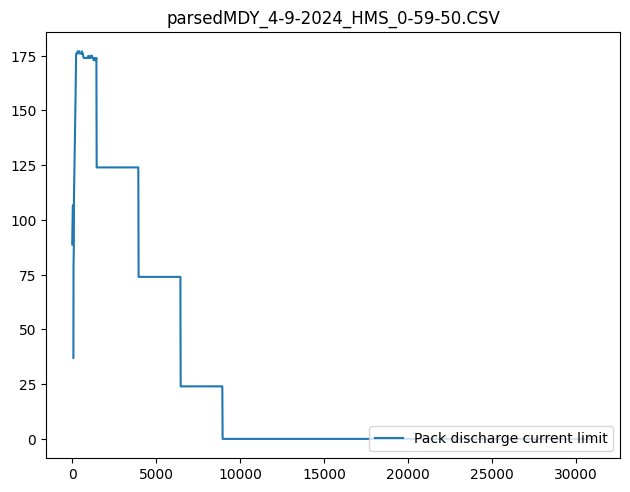

In [56]:
for name,df in logs.items():
    run_fault_lo = df['D3_Run_Fault_Lo']
    run_fault_hi = df['D4_Run_Fault_Hi']

    # plt.plot(df.index,run_fault_hi,color='r',label='Run Fault Lo')
    # plt.plot(df.index,run_fault_lo,color='g',label='Run Fault Hi')
    # plt.plot(df.index,df['acu_bms_gpio_state'],label='acu bms gpio state')
    plt.plot(df.index,df['Pack_DCL'],label='Pack discharge current limit')

    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title(name)
    plt.show()



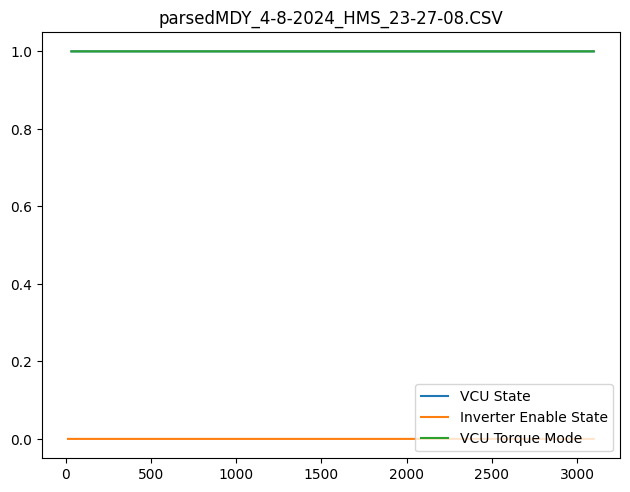

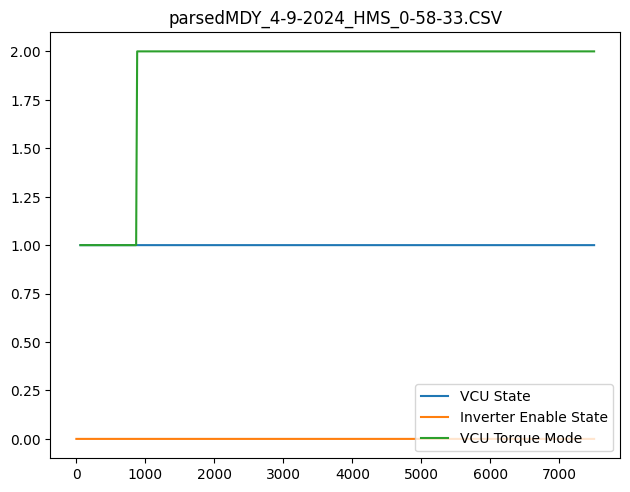

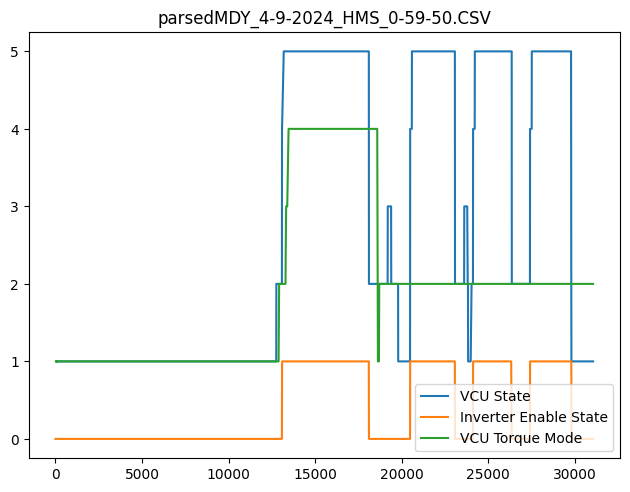

In [40]:
for name,df in logs.items():
    vcu_state = df['VCU_STATEMACHINE_STATE']
    inv_en_state = df['D6_Inverter_Enable_State']
    vcu_torque_mode = df['VCU_TORQUE_MODE']
    vcu_max_torque = df['VCU_MAX_TORQUE']
    vcu_thingy = df['VCU_ACTIVATE_BUZZER']
    
    plt.plot(df.index,vcu_state,label='VCU State')
    plt.plot(df.index,inv_en_state,label='Inverter Enable State')
    plt.plot(df.index,vcu_torque_mode,label='VCU Torque Mode')
    # plt.plot(df.index,vcu_max_torque,label='vcu_max_torque')
    # plt.plot(df.index,vcu_thingy,label='Buzzer')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title(name)
    plt.show()



2024-04-09 01:21:12,810 [WARNING] legend.py:1323: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


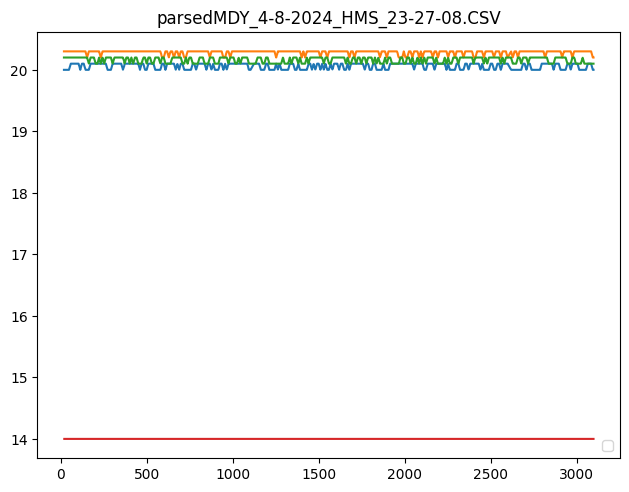

2024-04-09 01:21:13,047 [WARNING] legend.py:1323: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


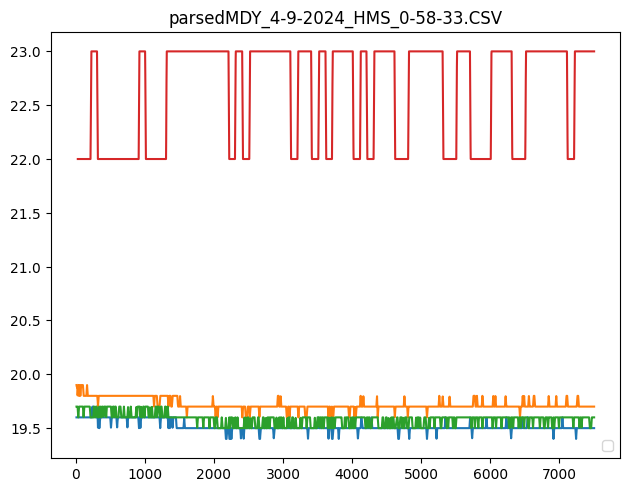

2024-04-09 01:21:13,286 [WARNING] legend.py:1323: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


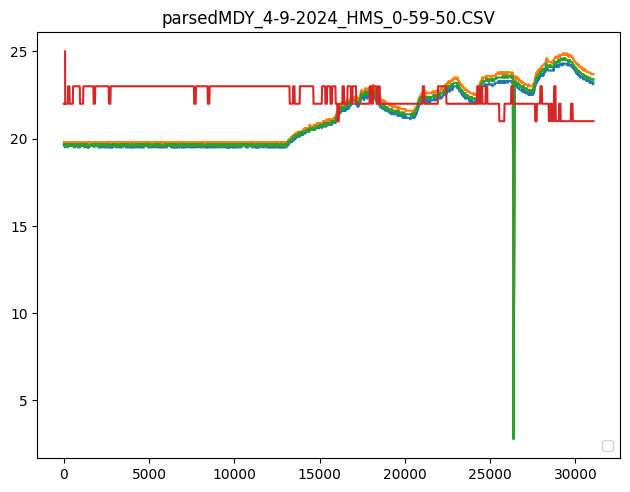

In [41]:
for name,df in logs.items():
    plt.plot(df.index,df['D1_Module_A'])
    plt.plot(df.index,df['D2_Module_B'])
    plt.plot(df.index,df['D3_Module_C'])
    plt.plot(df.index,df['Low_Temperature'])
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title(name)
    plt.show()



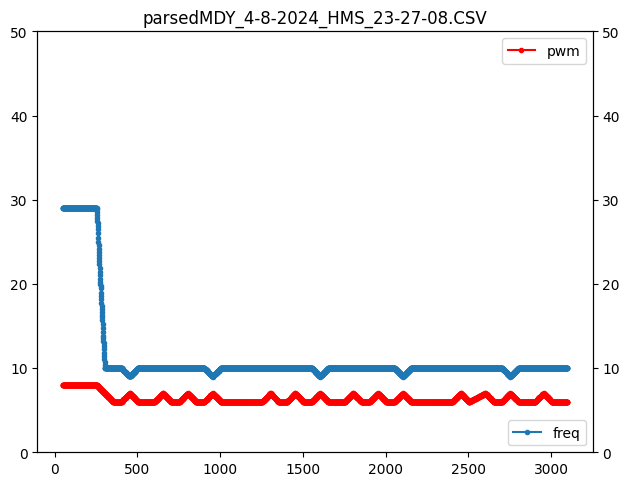

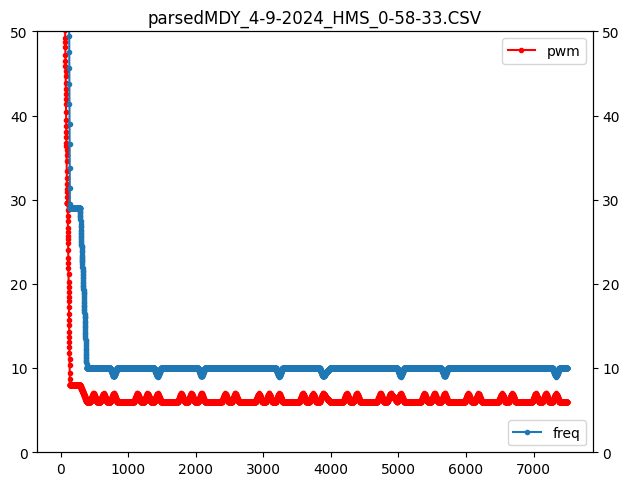

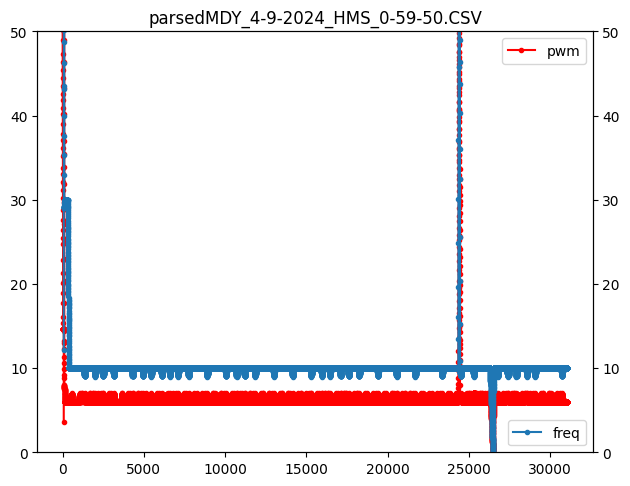

In [42]:
for name,df in logs.items():
    fig, ax = plt.subplots()
    ax.plot(df.index,df['acu_imd_pwm_duty'],marker='.',color='r',label='pwm')
    ax1 = ax.twinx()
    ax1.plot(df.index,df['acu_imd_pwm_frequency'],marker='.',label='freq')
    ax.set_ylim((0,50))
    ax1.legend()
    ax.legend()
    ax1.set_ylim((0,50))
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title(name)
    plt.show()



In [43]:
# list[log]

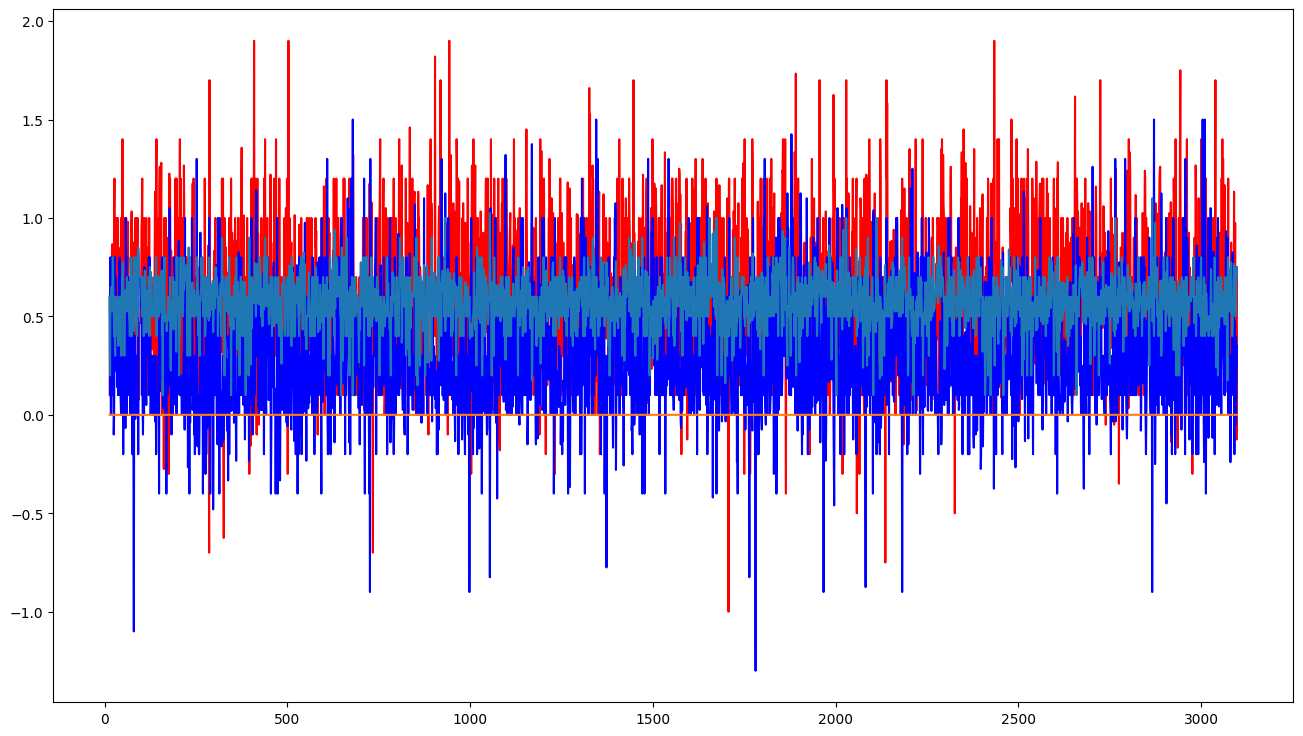

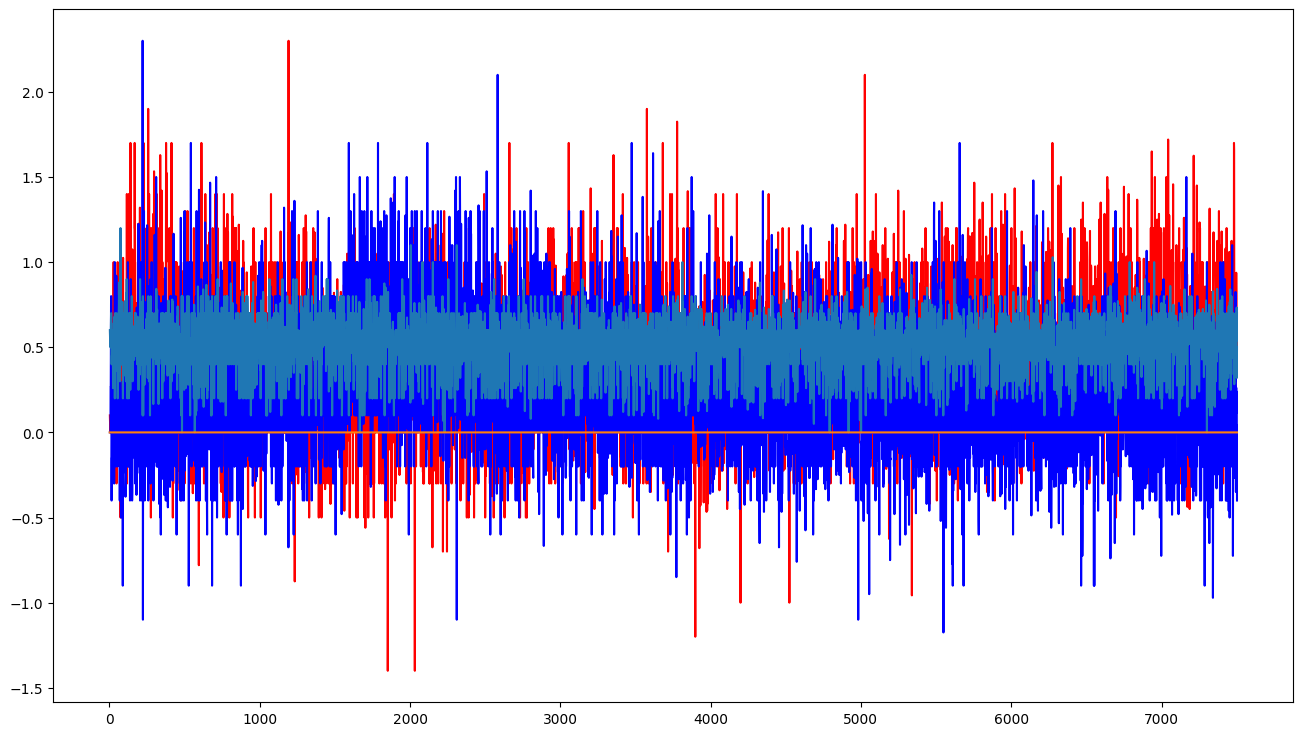

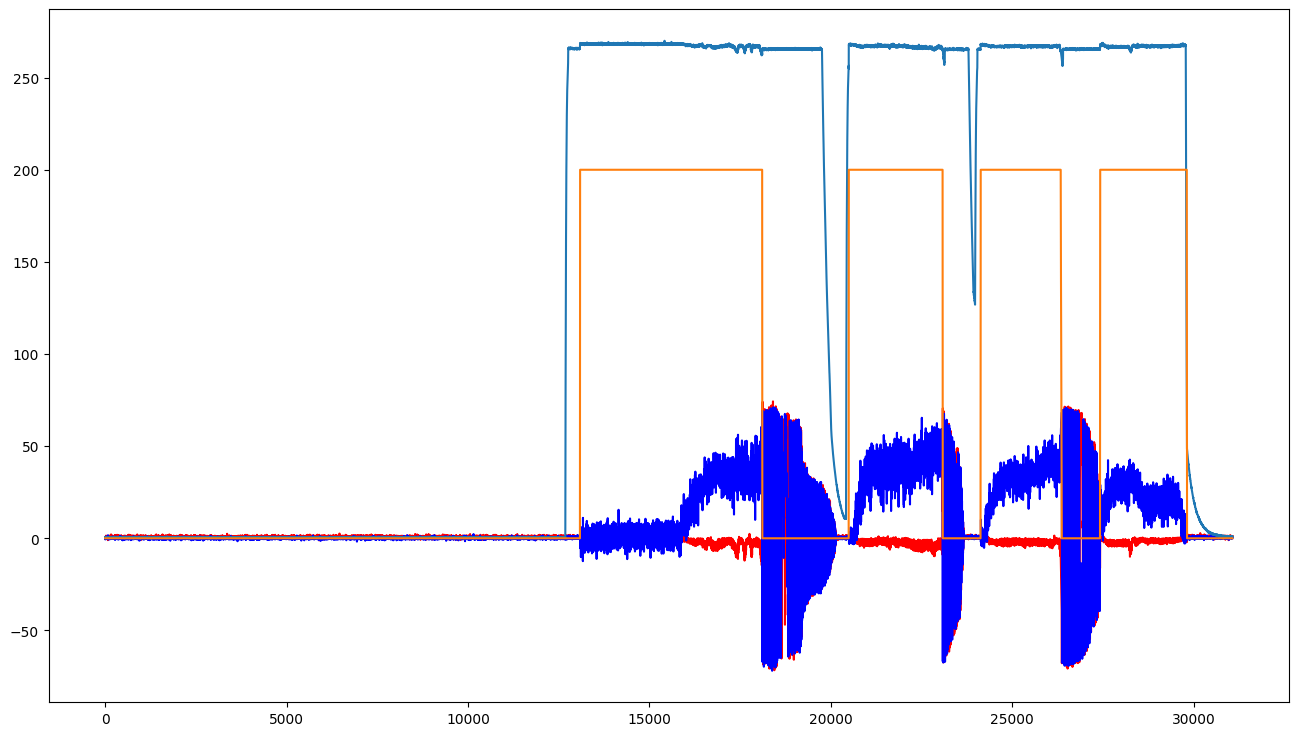

In [44]:
for name,df in logs.items():
    fig = plt.figure(figsize=(16,9))
    plt.plot(df.index,df['D3_VAB_Vd_Voltage'],color='r')
    plt.plot(df.index,df['D4_VBC_Vq_Voltage'],color='b')
    plt.plot(df.index,df["D1_DC_Bus_Voltage"])
    plt.plot(df.index,df['D6_Inverter_Enable_State']*200)
    plt.show()



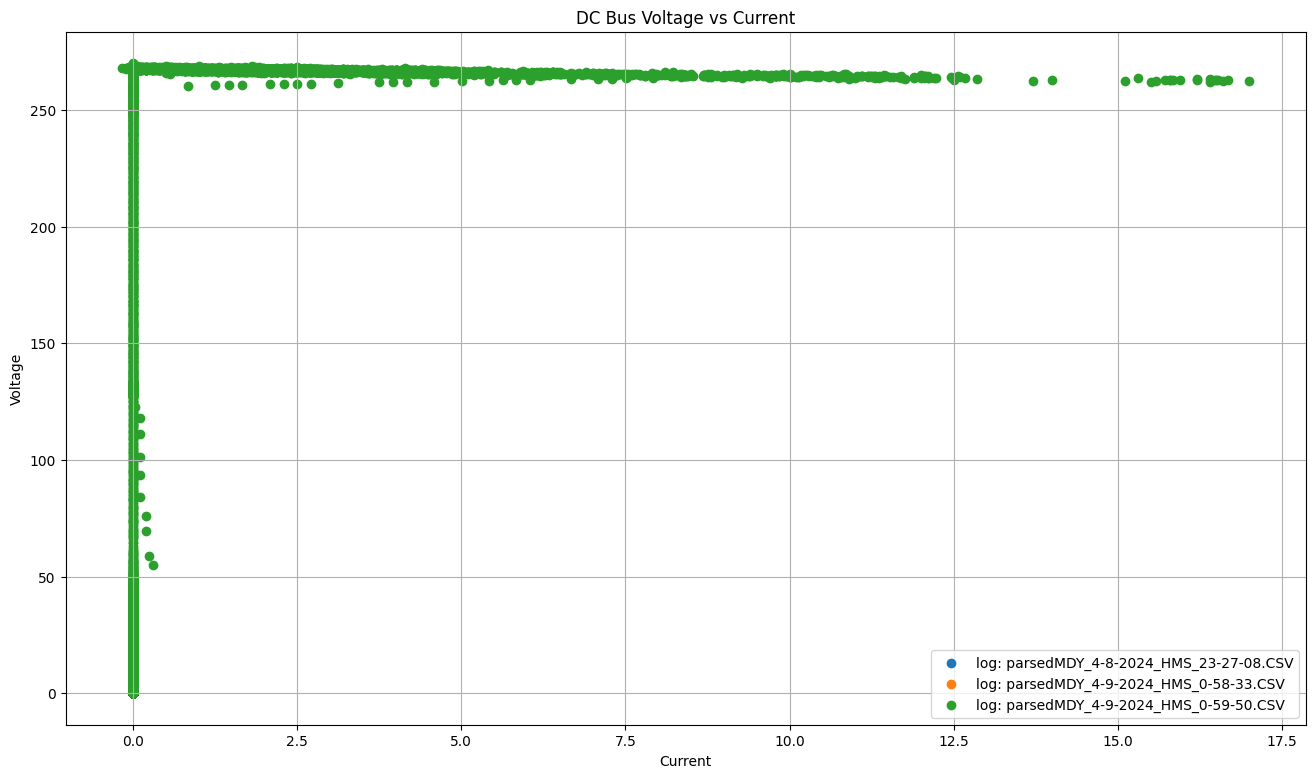

In [45]:
plt.figure(figsize=(16,9))

for name,df in logs.items():
    plt.scatter(df["D4_DC_Bus_Current"],df['D1_DC_Bus_Voltage'],label=f'log: {name}')
    # plt.scatter(df["D1_DC_Bus_Voltage"],df['D4_DC_Bus_Current'])
# plt.ylim((-10,400))
plt.grid(True)
plt.xlabel("Current")
plt.legend()
plt.ylabel("Voltage")
plt.title("DC Bus Voltage vs Current")
plt.show()


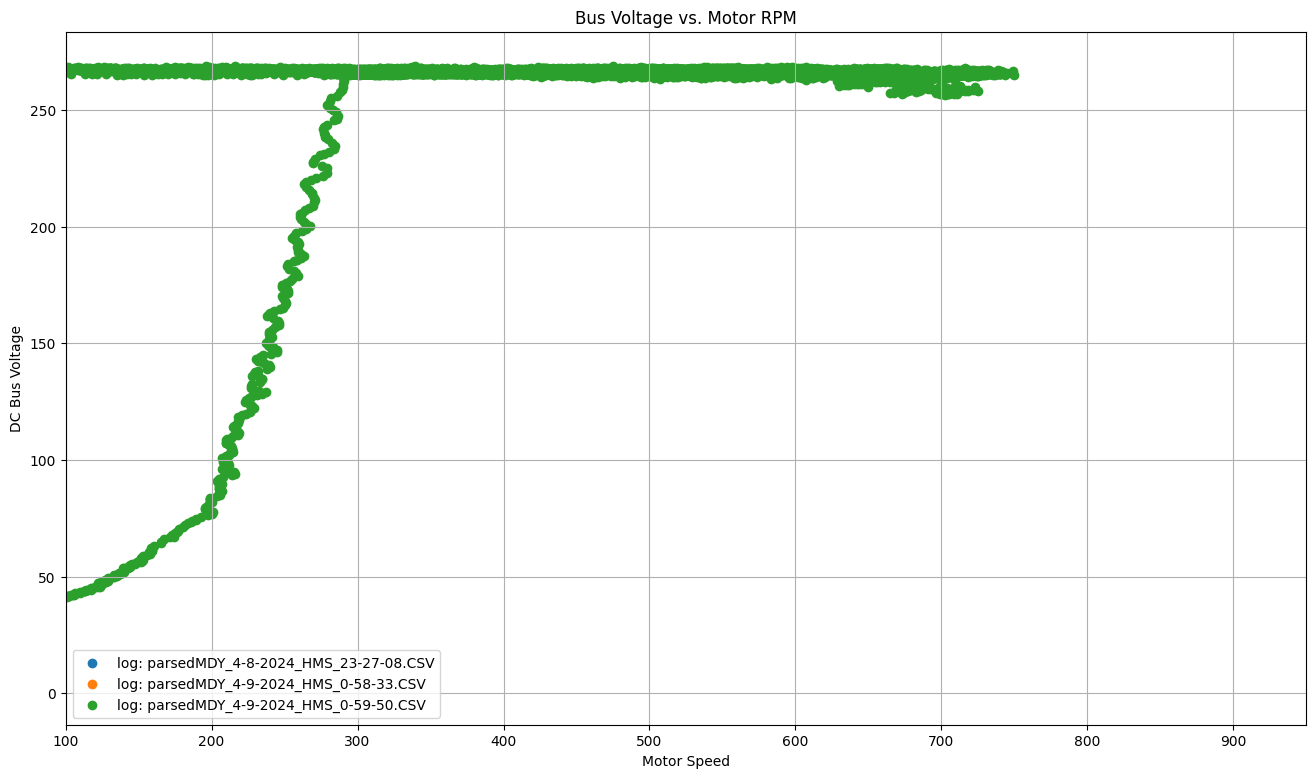

In [46]:
plt.figure(figsize=(16,9))
speed_max = 0
for name,df in logs.items():
    # plt.scatter(df['D1_DC_Bus_Voltage'],df['D2_Motor_Speed'])
    plt.scatter(df['D2_Motor_Speed'],df['D1_DC_Bus_Voltage'],label=f'log: {name}')
    if df['D2_Motor_Speed'].max() > speed_max:
        speed_max = df['D2_Motor_Speed'].max()
plt.xlabel("Motor Speed")
plt.ylabel("DC Bus Voltage")
plt.xlim((100,(speed_max+200)))
plt.grid(True)
plt.title("Bus Voltage vs. Motor RPM")
plt.legend()

In [47]:
for name,df in logs.items():
    print(list(df))

['D1_Module_A', 'D2_Module_B', 'D3_Module_C', 'D4_Gate_Driver_Board', 'D1_Control_Board_Temperature', 'D2_RTD1_Temperature', 'D3_RTD2_Temperature', 'D4_RTD3_Temperature', 'D1_RTD4_Temperature', 'D2_RTD5_Temperature', 'D3_Motor_Temperature', 'D4_Torque_Shudder', 'D1_Motor_Angle_Electrical', 'D2_Motor_Speed', 'D3_Electrical_Output_Frequency', 'D4_Delta_Resolver_Filtered', 'D1_Modulation_Index', 'D2_Flux_Weakening_Output', 'D3_Id_Command', 'D4_Iq_Command', 'D1_Post_Fault_Lo', 'D2_Post_Fault_Hi', 'D3_Run_Fault_Lo', 'D4_Run_Fault_Hi', 'D1_Commanded_Torque', 'D2_Torque_Feedback', 'D3_Power_On_Timer', 'D1_DC_Bus_Voltage', 'D2_Output_Voltage', 'D3_VAB_Vd_Voltage', 'D4_VBC_Vq_Voltage', 'APPS1', 'APPS2', 'BSE1', 'STEERING', 'D1_VSM_State', 'D2_Inverter_State', 'D3_Relay_1_Status', 'D3_Relay_2_Status', 'D3_Relay_3_Status', 'D3_Relay_4_Status', 'D3_Relay_5_Status', 'D3_Relay_6_Status', 'D4_Inverter_Run_Mode', 'D4_Inverter_Discharge_State', 'D5_Inverter_Command_Mode', 'D6_Inverter_Enable_State', 'D

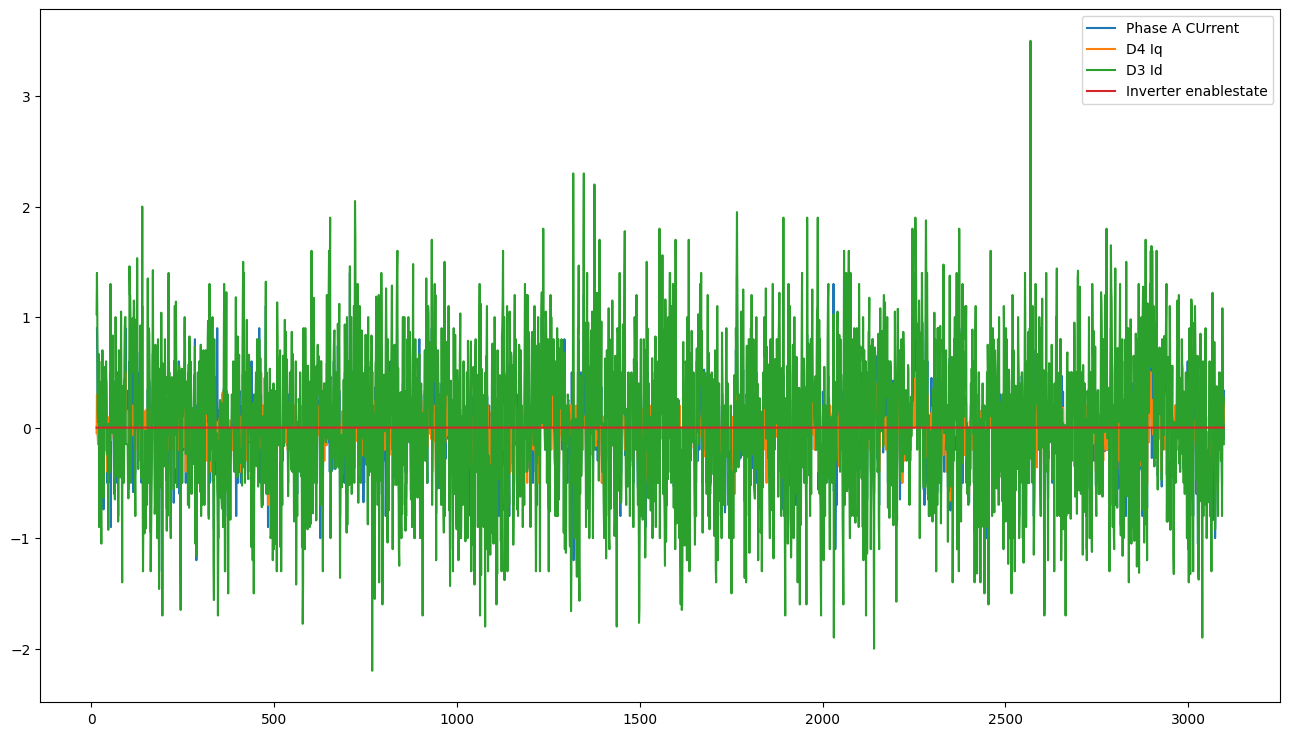

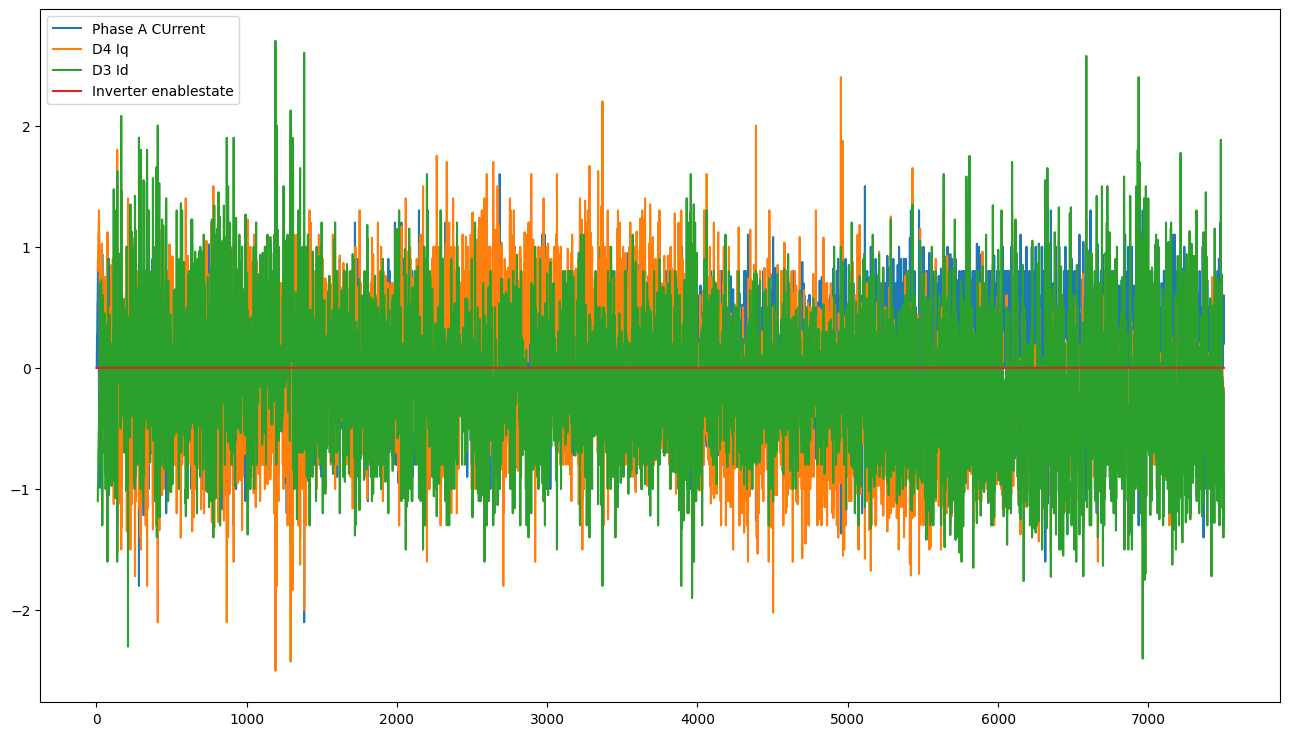

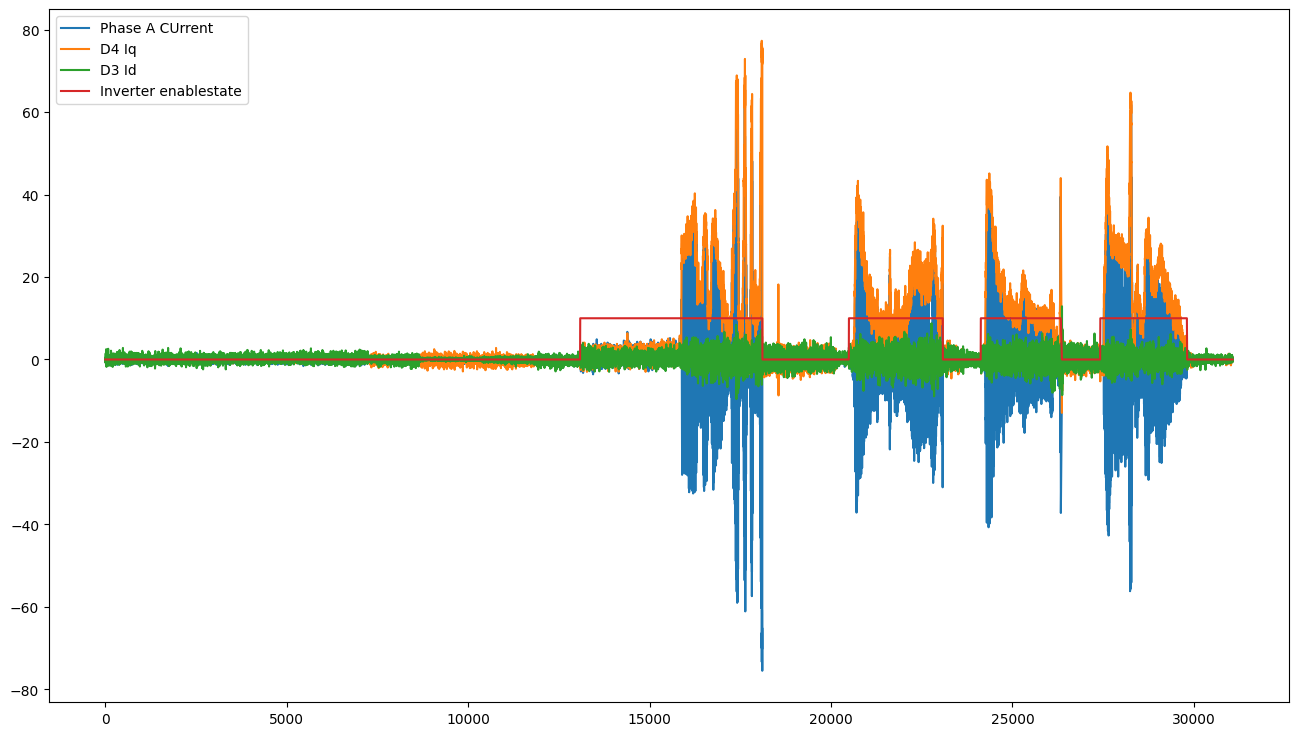

In [48]:

for name,df in logs.items():
    fig = plt.figure(figsize=(16,9))
    plt.plot(df.index,df['D1_Phase_A_Current'],label='Phase A CUrrent')
    plt.plot(df.index,df['D4_Iq'],label='D4 Iq')
    plt.plot(df.index,df['D3_Id']*-1,label='D3 Id')

    plt.plot(df.index,df['D6_Inverter_Enable_State']*10,label='Inverter enablestate')
    plt.legend()

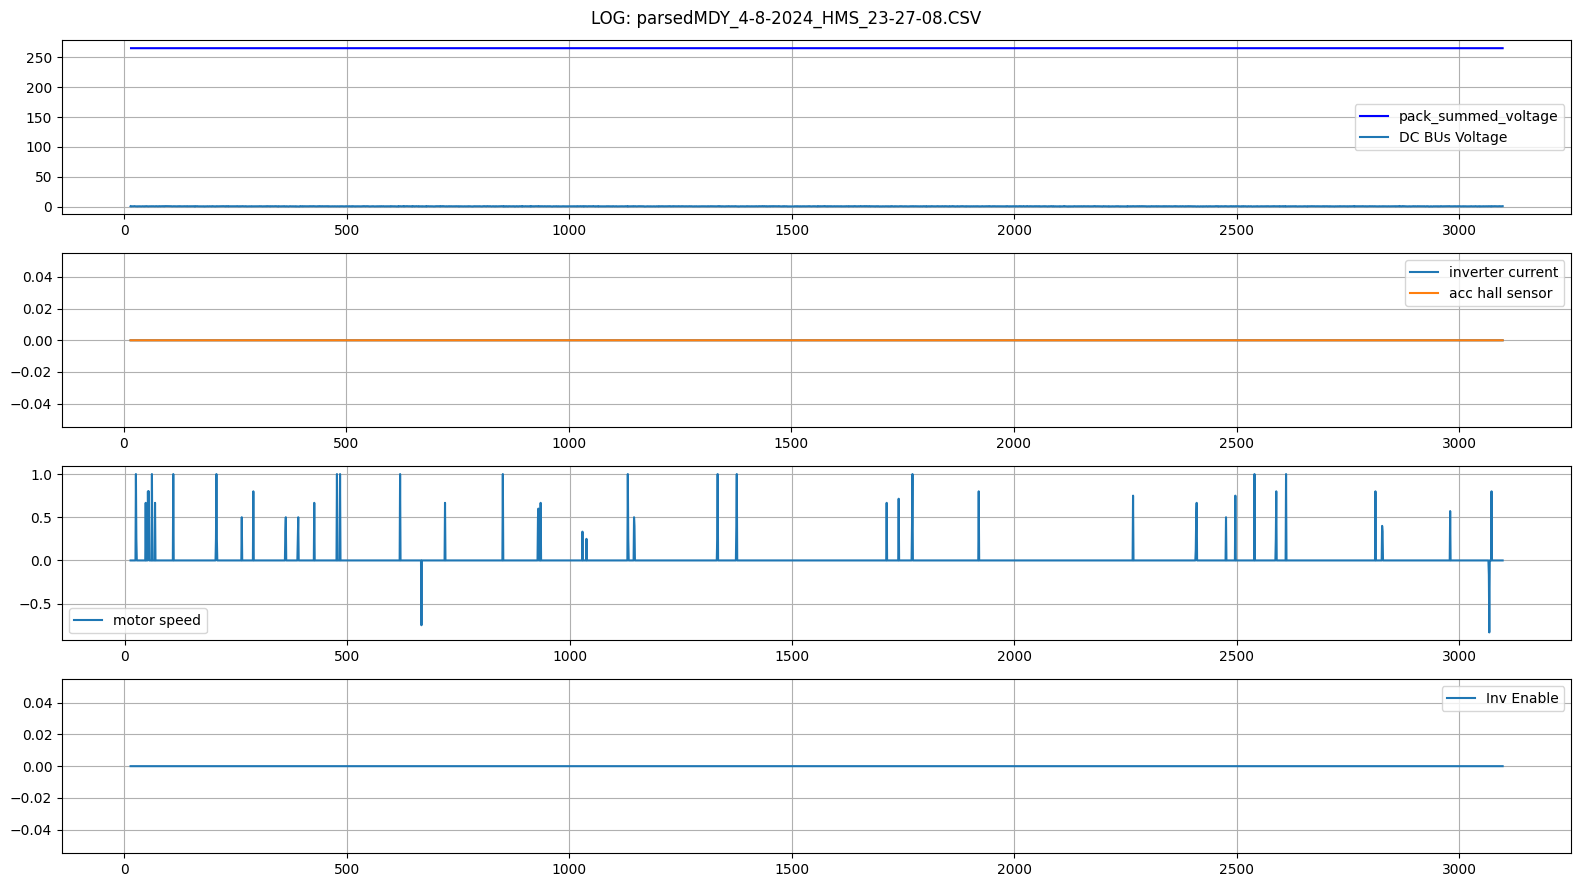

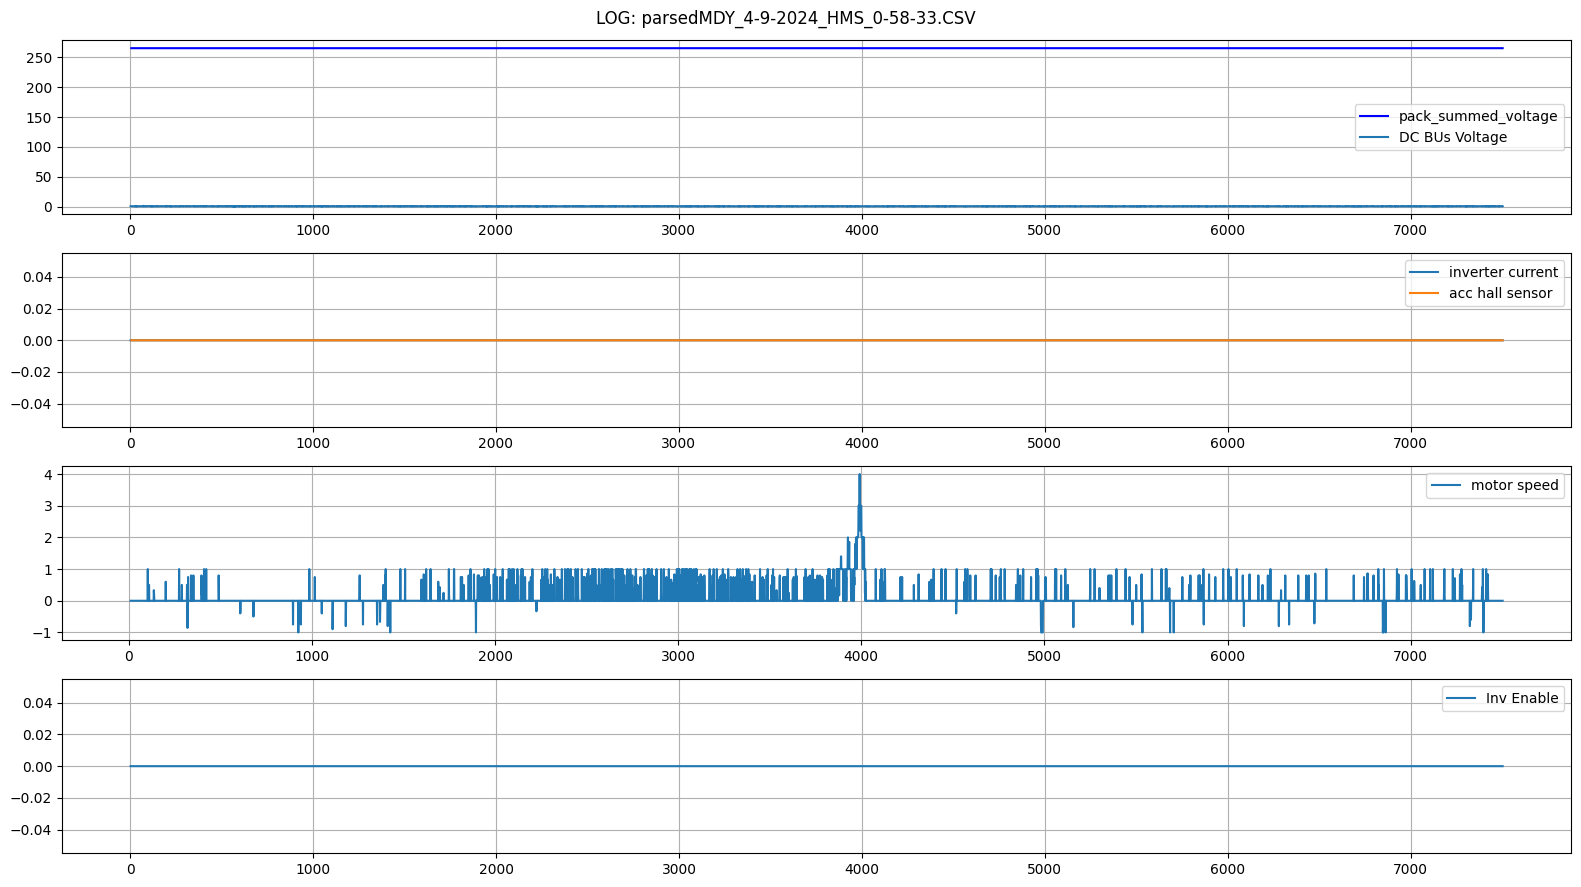

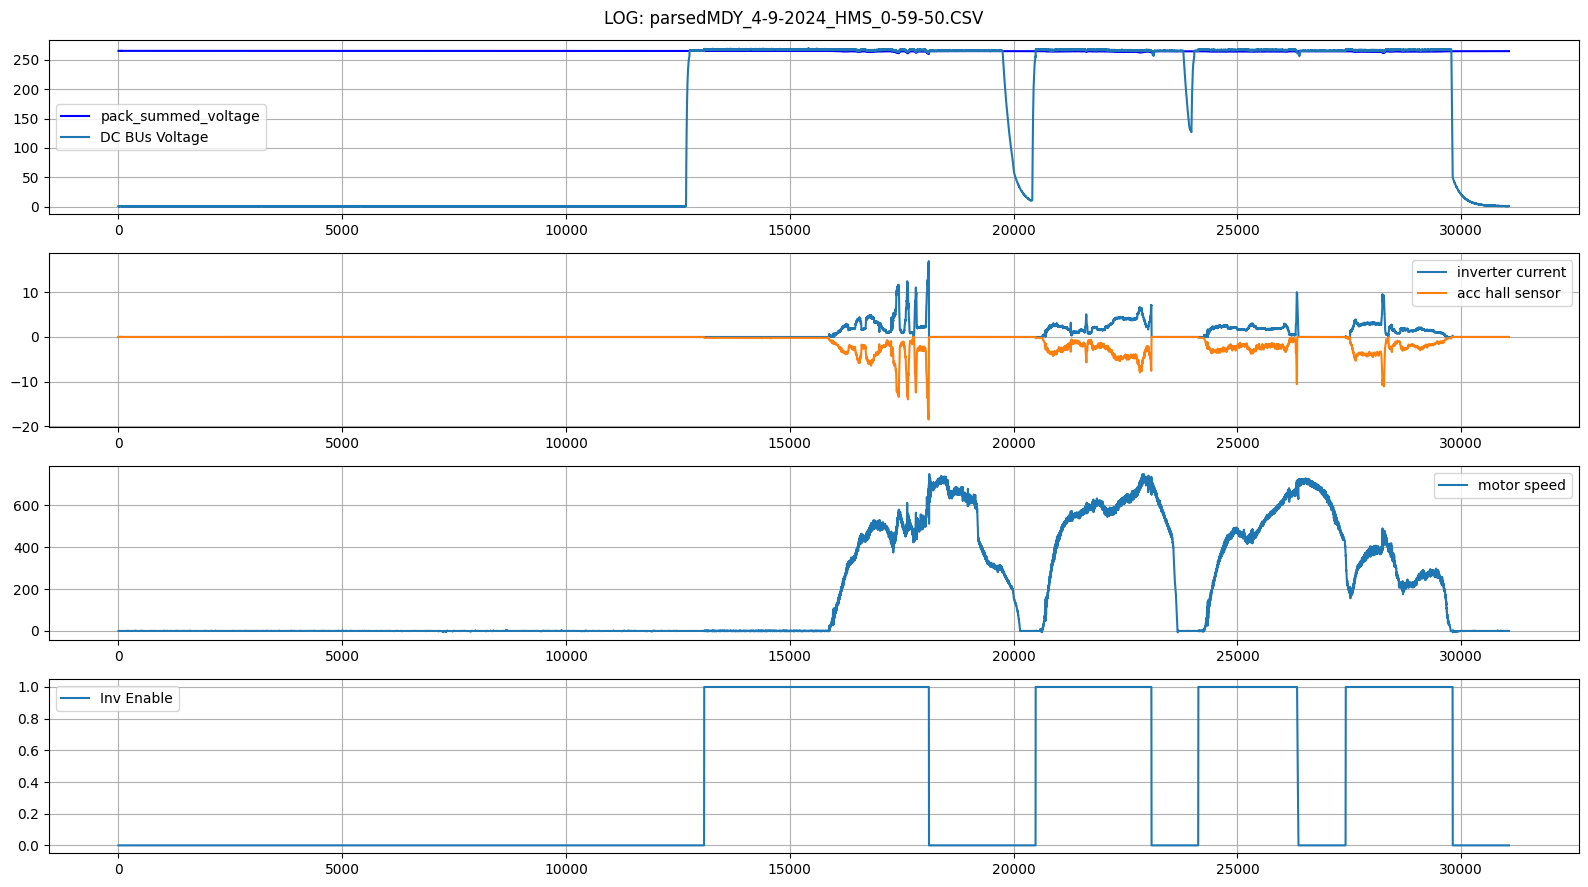

In [49]:
for name,df in logs.items():
    fig,(ax1,ax2,ax3,ax4)= plt.subplots(4,1,figsize=(16,9))

    # plt.plot(df.index,df['D1_DC_Bus_Voltage'],color='r',label='dc bus voltage')
    ax1.plot(df.index,df['Pack_Summed_Voltage'],color='b',label='pack_summed_voltage')
    ax1.plot(df.index,df['D1_DC_Bus_Voltage'],label='DC BUs Voltage')
    ax2.plot(df.index,df["D4_DC_Bus_Current"],label='inverter current')
    ax2.plot(df.index,df['Pack_Current']*-1,label='acc hall sensor')
    ax3.plot(df.index,df['D2_Motor_Speed'],label='motor speed')
    ax4.plot(df.index,df['D6_Inverter_Enable_State'],label='Inv Enable')
    for axis in fig.get_axes():
        axis.legend()
        axis.grid(True)
    plt.suptitle(f"LOG: {name}")
    plt.tight_layout()

    # plt.legend()
    plt.show()
    # plt.plot(df.index)
